<a href="https://colab.research.google.com/github/lucasgrezzi/learning/blob/main/Introdu%C3%A7%C3%A3o_a_Recomenda%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

filmes = pd.read_csv("dados/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes = filmes.set_index("filmeId")
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [2]:
notas = pd.read_csv("dados/ratings.csv")
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


# Primeira tentativa de recomendação: heurística de total de votos

In [4]:
total_de_votos = notas["filmeId"].value_counts()
total_de_votos.head()

,count
filmeId,
356,329
318,317
296,307
593,279
2571,278


In [5]:
filmes['total_de_votos'] = total_de_votos
filmes.head()

,titulo,generos,total_de_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


In [6]:
filmes.sort_values("total_de_votos", ascending = False).head(10)

,titulo,generos,total_de_votos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0
110,Braveheart (1995),Action|Drama|War,237.0
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0


In [7]:
notas_medias = notas.groupby("filmeId").mean()["nota"]
notas_medias.head()

,nota
filmeId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


In [8]:
filmes["nota_media"] = notas_medias
filmes.sort_values("total_de_votos", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000
110,Braveheart (1995),Action|Drama|War,237.0,4.031646
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982


# Uma segunda heurística: nota média e filtrando votos

In [9]:
filmes.sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
187717,Won't You Be My Neighbor? (2018),Documentary,1.0,5.0
6983,Jane Eyre (1944),Drama|Romance,1.0,5.0
5328,Rain (2001),Drama|Romance,1.0,5.0
95843,Goodbye Charlie (1964),Comedy|Fantasy|Romance,1.0,5.0
3941,Sorority House Massacre (1986),Horror,1.0,5.0
3940,Slumber Party Massacre III (1990),Horror,1.0,5.0
3939,Slumber Party Massacre II (1987),Horror,1.0,5.0
7815,True Stories (1986),Comedy|Musical,1.0,5.0
162414,Moonlight,Drama,1.0,5.0


In [10]:
filmes.query("total_de_votos >= 10").sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1041,Secrets & Lies (1996),Drama,11.0,4.590909
3451,Guess Who's Coming to Dinner (1967),Drama,11.0,4.545455
1178,Paths of Glory (1957),Drama|War,12.0,4.541667
1104,"Streetcar Named Desire, A (1951)",Drama,20.0,4.475000
2360,"Celebration, The (Festen) (1998)",Drama,12.0,4.458333
1217,Ran (1985),Drama|War,15.0,4.433333
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
951,His Girl Friday (1940),Comedy|Romance,14.0,4.392857
1927,All Quiet on the Western Front (1930),Action|Drama|War,10.0,4.350000


In [11]:
filmes_com_mais_de_50_votos = filmes.query("total_de_votos >= 50")
filmes_com_mais_de_50_votos.sort_values("nota_media", ascending = False).head(10)


,titulo,generos,total_de_votos,nota_media
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


In [12]:
eu_assisti = [1, 21, 19, 10, 11, 7, 2]
filmes.loc[eu_assisti]

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [13]:
aventura_infantil_e_fantasia = filmes_com_mais_de_50_votos.query("generos=='Adventure|Children|Fantasy'")
aventura_infantil_e_fantasia.drop(eu_assisti, errors='ignore').sort_values("nota_media", ascending = False).head(10)

,titulo,generos,total_de_votos,nota_media
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548


In [14]:
# Collaborative filtering x Content based filtering

# **Definindo a distância euclidiana entre usuários**

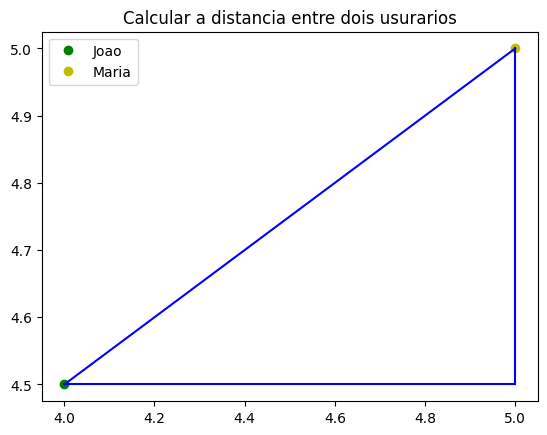

In [15]:
#joao = [4,4.5]
#maria = [5,5]

import matplotlib.pyplot as plt

plt.plot(4, 4.5,"go")
plt.plot(5, 5, "yo")
plt.legend(["Joao","Maria"])
plt.title("Calcular a distancia entre dois usurarios")

plt.plot([4, 5], [4.5, 4.5],color = "blue", linestyle="-")
plt.plot([4, 5], [4.5, 5], color = "blue",linestyle="-")
plt.plot([5, 5], [5, 4.5],color = "blue" ,linestyle="-")

In [16]:
import numpy as np

joao =  np.array([4,4.5])
maria = np.array([5,5])

joao - maria

array([-1. , -0.5])

In [17]:
from math import sqrt

def pitagoras(a,b):
  (delta_x,delta_y) = a - b
  return sqrt(delta_x * delta_x + delta_y * delta_y)
pitagoras(joao,maria)

1.118033988749895

In [18]:
# de um jeito mais simplificado

def pitagoras(a,b):
  return np.linalg.norm( a - b)
pitagoras(joao,maria)

np.float64(1.118033988749895)

In [21]:
def distancia_de_vetores(a,b):
  return np.linalg.norm(a - b)

def notas_do_usuario(usuario):
  notas_do_usuario = notas.query("usuarioId==%d" % usuario)
  notas_do_usuario = notas_do_usuario[["filmeId", "nota"]].set_index("filmeId")
  return notas_do_usuario

usuario1 = notas_do_usuario(1)
usuario4 = notas_do_usuario(4)

usuario1.head()

usuario4.head()

diferencas = usuario1.join(usuario4, lsuffix="_esquerda", rsuffix="_direita").dropna()
distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])

def distancia_de_usuarios(usuario_id1, usuario_id2):
  notas1 = notas_do_usuario(usuario_id1)
  notas2 = notas_do_usuario(usuario_id2)
  diferencas = notas1.join(notas2, lsuffix="_esquerda", rsuffix="_direita").dropna()
  return distancia_de_vetores(diferencas['nota_esquerda'], diferencas['nota_direita'])

distancia_de_usuarios(1,4)

np.float64(11.135528725660043)